# Skin Lesion Classifier

## Import Training Data

Training data has 25331 samples.
'MEL':	628	(17.85%)
'NV':	628	(50.83%)
'BCC':	628	(13.12%)
'AK':	628	(3.42%)
'BKL':	628	(10.36%)
'DF':	628	(0.94%)
'VASC':	628	(1.00%)
'SCC':	628	(2.48%)


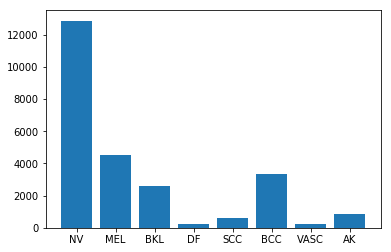

In [6]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline


df_ground_truth = pd.read_csv('C:\ISIC_2019\ISIC_2019_Training_GroundTruth.csv')

# Categories not include UNK
categories = list(df_ground_truth.columns.values[1:9])
# print(categories)

int_to_category = dict((i, c) for i, c in enumerate(categories))

X = df_ground_truth['image']
y = pd.Series([int_to_category[np.argmax(x)] for x in np.array(df_ground_truth.iloc[:,1:])], name="category")
count_per_category = Counter(y)
total_sample_count = sum(count_per_category.values())
print("Training data has {} samples.".format(total_sample_count))

for c in categories:
    print("'%s':\t%d\t(%.2f%%)" % (c, count_per_category[key], count_per_category[c]*100/total_sample_count))

fig = plt.bar(count_per_category.keys(), count_per_category.values())

### Shuffle and Split Data

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

print("Training set has {} samples.".format(X_train.shape[0]))
count_per_category_train = Counter(y_train)
sample_count_train = sum(count_per_category_train.values())
for key in categories:
    print("'%s':\t%d\t(%.2f%%)" % (key, count_per_category_train[key], count_per_category_train[key]*100/sample_count_train))
    
print("\nValidation set has {} samples.".format(X_val.shape[0]))
count_per_category_val = Counter(y_val)
sample_count_val = sum(count_per_category_val.values())
for key in categories:
    print("'%s':\t%d\t(%.2f%%)" % (key, count_per_category_val[key], count_per_category_val[key]*100/sample_count_val))

Training set has 20264 samples.
'MEL':	3618	(17.85%)
'NV':	10300	(50.83%)
'BCC':	2658	(13.12%)
'AK':	694	(3.42%)
'BKL':	2099	(10.36%)
'DF':	191	(0.94%)
'VASC':	202	(1.00%)
'SCC':	502	(2.48%)

Validation set has 5067 samples.
'MEL':	904	(17.84%)
'NV':	2575	(50.82%)
'BCC':	665	(13.12%)
'AK':	173	(3.41%)
'BKL':	525	(10.36%)
'DF':	48	(0.95%)
'VASC':	51	(1.01%)
'SCC':	126	(2.49%)


### Examples of Each Category

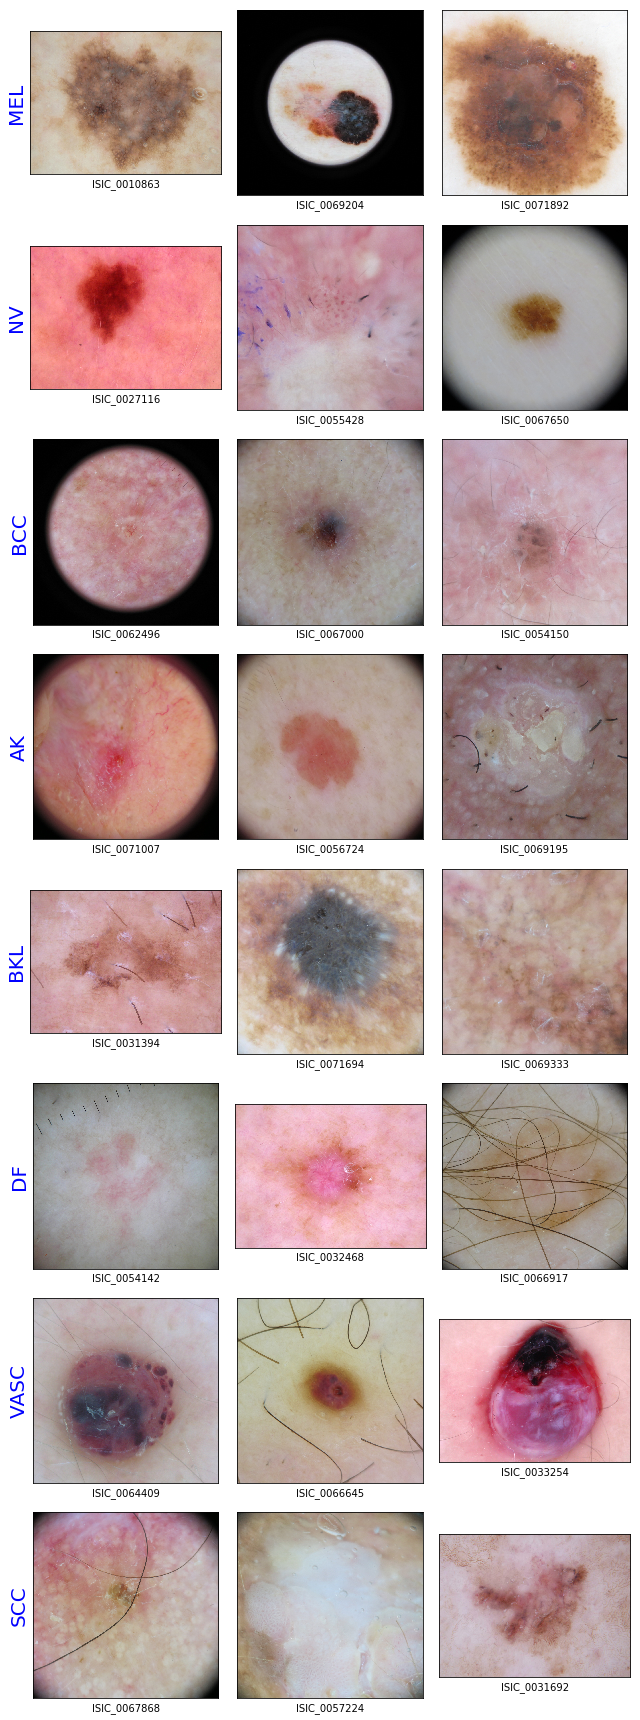

In [85]:
from IPython.display import Image
import os

# dermoscopic images folder path
derm_image_folder = 'C:\ISIC_2019\ISIC_2019_Training_Input'

df_train = pd.merge(X_train, y_train, left_index=True, right_index=True, how='outer')

category_groups = df_train.groupby('category')

# Number of examples for each category
num_per_category = 3

fig, axes = plt.subplots(nrows=len(categories), ncols=num_per_category, figsize=(9, 24))
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
fig.patch.set_facecolor('white')

for idx, val in enumerate(categories):
    i = 0
    for index, row in category_groups.get_group(val).head(num_per_category).iterrows():
        ax = axes[idx, i]
        ax.imshow(plt.imread(os.path.join(derm_image_folder, row['image']+'.jpg')))
        ax.set_xlabel(row['image'])
        if ax.is_first_col():
            ax.set_ylabel(val, fontsize=20)
            ax.yaxis.label.set_color('blue')
        i += 1
    
fig.tight_layout()